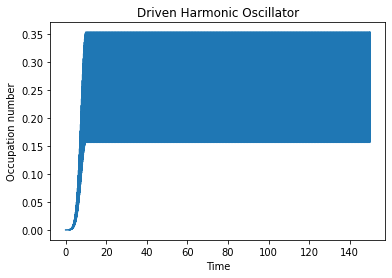

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
def gaussian_ramp(t0, amplitude):
    """
    Creates a time-dependent function using a Gaussian function that starts near zero,
    peaks at 'amplitude' at time 't0', and remains constant at 'amplitude' for t > t0.

    Args:
    t0 (float): The time at which the function peaks at the amplitude.
    amplitude (float): The maximum amplitude of the Gaussian peak.

    Returns:
    function: A function of time 't' that implements the desired behavior.
    """
    # Define the standard deviation such that the peak is sharp at t0
    sigma = t0 / 3  # Adjust sigma to make the function start close to zero at t=0

    # Define the function using a closure to encapsulate the parameters
    def time_dependent_function(t):
        if t <= t0:
            # Gaussian function centered at t0
            return amplitude * np.exp(-((t - t0)**2) / (2 * sigma**2)) - amplitude * np.exp(-((0 - t0)**2) / (2 * sigma**2))
        else:
            # Return constant amplitude for t > t0
            return amplitude- amplitude * np.exp(-((0 - t0)**2) / (2 * sigma**2))

    return time_dependent_function
func = gaussian_ramp(10, 1 * 2 * np.pi)

# Define system parameters
omega = 6*2*np.pi        # Natural frequency of the oscillator
gamma = 0.05        # Damping rate
A = 1*2*np.pi             # Driving amplitude
omega_d = 4*2*np.pi       # Driving frequency
N = 15              # Number of basis states

# Define the annihilation and creation operators
a = destroy(N)

# Hamiltonian for the driven harmonic oscillator
H0 = omega * a.dag() * a  # Harmonic oscillator Hamiltonian
H1 =  (a + a.dag())    # Driving term

# Time-dependent Hamiltonian
def H(t, args):
    return H0 + H1*np.cos(omega_d*t)*func(t)

# Initial state (ground state)
psi0 = basis(N, 0)

# Time array
tlist = np.linspace(0, 150,100000)

# Solve the Schrodinger equation
result = sesolve(H, psi0, tlist, [a.dag() + a,-1j*(a-a.dag())])

# Plot the expectation value of the number operator
plt.figure()
plt.plot(tlist, np.abs(result.expect[0]+1j*result.expect[1])**2)
# plt.ylim(0.49,0.5)
plt.xlabel('Time')
plt.ylabel('Occupation number')
plt.title('Driven Harmonic Oscillator')
plt.show()


In [181]:
np.abs(result.expect[0]+1j*result.expect[1])

array([0.00000000e+00, 7.02159816e-08, 2.58635649e-07, ...,
       5.93237733e-01, 5.93541388e-01, 5.93636864e-01])

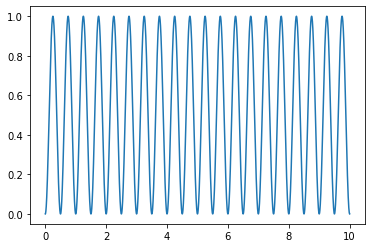

In [153]:
plt.plot(tlist,A/(omega-omega_d)/2*(1-np.cos((omega-omega_d)*tlist))*2)

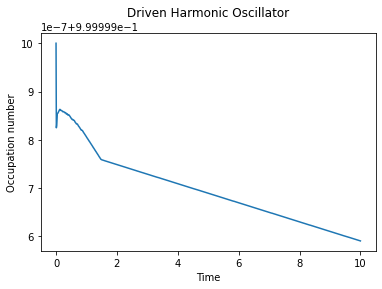

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters
omega = 1.0         # Natural frequency of the oscillator
gamma = 0.05        # Damping rate
A = 0.5             # Driving amplitude
omega_d = 1.0       # Driving frequency
N = 30              # Number of basis states

# Define the annihilation and creation operators
a = destroy(N)

# Hamiltonian for the driven harmonic oscillator
H0 = omega * a.dag() * a  # Harmonic oscillator Hamiltonian
H1 = 0 * (a + a.dag())    # Driving term

# Time-dependent Hamiltonian
def H(t, args):
    return H0 + H1 * np.cos(omega_d * t)

# Initial state (coherent state)
alpha = 1
psi0 = coherent(N, alpha)

# Time array
tlist = np.linspace(0, 10, 1000)

# Solve the Schrodinger equation
result = sesolve(H, psi0, tlist, [(a.dag() + a)/2,(-1j*(a-a.dag()))/2])

# Extract the expectation values for phase space plotting
x = np.real(result.states)
p = np.imag(result.states)

# Plot the expectation value of the number operator
plt.figure()
plt.plot(tlist, np.abs(result.expect[0]+1j*result.expect[1]))
plt.xlabel('Time')
plt.ylabel('Occupation number')
plt.title('Driven Harmonic Oscillator')
plt.show()


In [57]:
x

array([], dtype=float64)